<a href="https://colab.research.google.com/github/LanqingDu/UnstructuredDataAnalytics/blob/main/09_TopicModeling.ipynb" target="_blank">
<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# **Topic Modeling**



> **Instructor:** Dr. Lanqing Du  
> **Acknowledgement:** This notebook referenced to R user guide content and Machine Learning resoures.  
> **Objective:** Introduction to Topic Modeling using R.  
> **Instructions:** You can preview the **Table of Contents** from the side bar.

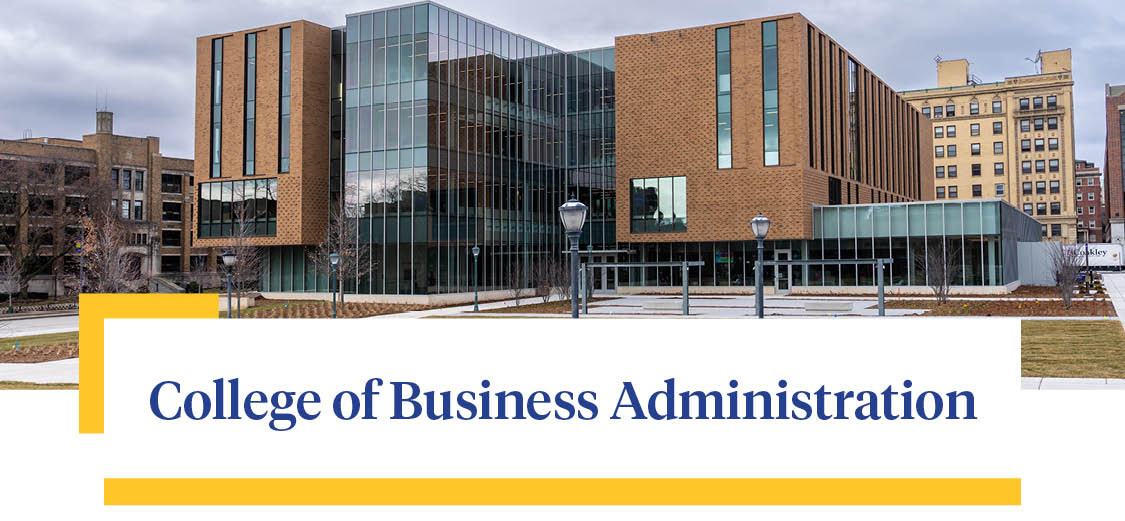
---

## [1. Intro and Objective](#obj)

This tutorial utilizes the dataset ``AssociatedPress`` provided by the ``topicmodels`` package, ``gutenbergr`` dataset and ``deceptive-opinion.csv``.

We begin our introduction to frequency counts starting from the *count()* function. The following tasks will guide our workflow:

1. **Library Setup**
Install and load all required packages for data access, text processing, and visualization.

2. **Data Exploration**
Import the dataset and review its structure, variables, and any predefined helper functions.

3. **Text Preprocessing**
Clean and transform the text into a structured format (e.g., data frame or tibble) for analysis — also known as text tidying.

4. **Topic Modeling:** The NLP task of identifying automatically identifying major themes in a text, usually by identifying informative words. There are two main uses for topic modeling.
    * The first is to help in identifying major topics in unlabeled texts. You can think of it as a replacement for word clouds to help you understand the recurring themes in a text
    * The second use is to identify which words are important for text that is labeled for topic. In this tutorial we’ll practice both kinds of topic modeling
    * We'll be mainly focus on the ``LDA()`` (Latent Dirichlet allocation).

5. ``LDA()``

    * **Latent Dirichlet allocation** is one of the most common algorithms for topic modeling. Without diving into the math behind the model, we can understand it as being guided by two principles.

    * **Every document is a mixture of topics:** We imagine that each document may contain words from several topics in particular proportions. For example, in a two-topic model we could say “Document 1 is 90% topic A and 10% topic B, while Document 2 is 30% topic A and 70% topic B.”

    * **Every topic is a mixture of words:** For example, we could imagine a two-topic model of American news, with one topic for “politics” and one for “entertainment.” The most common words in the politics topic might be “President”, “Congress”, and “government”, while the entertainment topic may be made up of words such as “movies”, “television”, and “actor”. Importantly, words can be shared between topics; a word like “budget” might appear in both equally

    **LDA is a mathematical method for estimating both of these at the same time: finding the mixture of words that is associated with each topic, while also determining the mixture of topics that describes each document.** There are a number of existing implementations of this algorithm, and we’ll explore one of them in depth.


5. **Advanced Topics with LDA:**






## [2. Libraries](#ML)

We'll be requiring libraries for
*   data manipulation
*   visualization
*   analysis






In [ ]:
# ============================================================
# Step 1-1: an R function used to run system commands
# (i.e., commands that you would normally type in a terminal or command prompt).
# ============================================================

#  system2(command, args)
#   command       : Character string specifying the system command to run
#                   (e.g., "sudo", "ls", "Rscript").
#   args          : Character vector or string specifying arguments passed to the command.
#                   Here, "apt-get install libgsl0-dev" tells the system to install the
#                   GNU Scientific Library (GSL) development package using the apt package manager.
#   Returns       : The exit status of the system command (0 for success, non-zero for error).
#   Output        : Executes the specified system command in the operating system shell.
#                   May print messages to the R console depending on the system output.
#   Example       : Installs the 'libgsl0-dev' package on a Debian/Ubuntu system, required
#                   for compiling certain R packages that depend on the GSL library, for
#                   example topicmodels LDA(), CTM()

system2('sudo', 'apt-get install libgsl0-dev')

In [ ]:
# ============================================================
# Step 1-2: Install the Common Libraries
# ============================================================

install.packages("tidyverse") # designed to make data manipulation, visualization, and analysis more user-friendly
install.packages("tidytext") # provides functions for tokenizing, counting words, and analyzing text data in a structured manner
install.packages("tm") # provides functions for text preprocessing, term-document matrix creation, and text mining tasks.
install.packages("topicmodels") # used for topic modeling, which is a technique to uncover latent topics within a collection of documents
install.packages("SnowballC") # for stemming
install.packages("reshape2") # for reshaping and transforming data between wide and long formats
install.packages("scales") # formatting and transforming axis labels, legends, and numeric values in visualizations
install.packages("gutenbergr")

library(tidyverse) # general utility & workflow functions
library(tidytext) # tidy implimentation of NLP methods
library(tm) # general text mining functions, making document term matrixes
library(topicmodels)  # used for topic modeling, which is a technique to uncover latent topics within a collection of documents
library(SnowballC) # for stemming
library(reshape2) # convert between wide and long formats
library(scales)
library(gutenbergr)


## [3. Intro to LDA() - Dataset 1](#lda1)

In this section, we'll use the dataset ``AssociatedPress`` from ``library(topicmodels)``. ``AssociatedPress`` is a document-term matrix containing word frequencies from a collection of news articles published by the Associated Press. It consists of 2,246 documents (news articles) and 10,473 unique terms (words). Each entry in the matrix represents how many times a given word appears in a particular article.

**Objective:** Although we do not know which topic(s) each document (news articles) belongs to, we can use the LDA() function to infer potential topics and gain insights from the document data.


#### 3.1. Data exploration

In [ ]:
# ============================================================
# Step 2-1: Load the data
# ============================================================

#  DocumentTermMatrix
#   Description    : A matrix representation of text data where each row corresponds
#                    to a document and each column corresponds to a term (word or token).
#                    The entries indicate how often each term appears in each document.
#   documents      : 2246
#                    → Number of text documents included in the corpus.
#   terms          : 10473
#                    → Number of unique terms (after preprocessing such as tokenization,
#                      stopword removal, and stemming).
#   Non-/sparse entries : 302031 / 23220327
#                    → 302,031 cells in the matrix contain non-zero term frequencies
#                      (terms that actually appear in documents).
#                      → 23,220,327 cells contain zeros (terms that do not appear in
#                        particular documents).
#   Sparsity       : 99%
#                    → Proportion of zero entries in the matrix.
#                      A sparsity of 99% means that most term-document combinations
#                      are empty (terms appear in very few documents).
#   Maximal term length : 18
#                    → The longest term (word) in the vocabulary contains 18 characters.
#   Weighting      : term frequency (tf)
#                    → The matrix stores raw term counts — the number of times each term
#                      occurs in each document (not weighted by tf-idf or other schemes).

data("AssociatedPress")
AssociatedPress

<<DocumentTermMatrix (documents: 2246, terms: 10473)>>
Non-/sparse entries: 302031/23220327
Sparsity           : 99%
Maximal term length: 18
Weighting          : term frequency (tf)

In [ ]:
# ============================================================
# Step 2-2: Explore the data
# ============================================================

#  as.matrix(AssociatedPress[1:5, 1:10])
#   Function       : Converts a subset of a sparse DocumentTermMatrix (or TermDocumentMatrix)
#                    object into a standard R matrix for easier viewing or manipulation.
#
#   AssociatedPress : A built-in DocumentTermMatrix dataset in the 'tm' package containing
#                     word frequencies from 2,246 Associated Press news articles.
#
#   [1:5, 1:10]     : Indexing operation selecting a subset of the matrix:
#                       - Rows 1 to 5   → the first 5 documents.
#                       - Columns 1 to 10 → the first 10 terms (words).
#
#   as.matrix(...)  : Converts the selected sparse portion of the DocumentTermMatrix into
#                     a dense R matrix, where:
#                       - Rows represent documents.
#                       - Columns represent terms.
#                       - Entries show the term frequency (number of times each term
#                         appears in each document).
#
#   Returns         : A 5 × 10 standard numeric matrix.
#   Output          : Each cell (i, j) indicates how many times term *j* appears
#                     in document *i*.
#

as.matrix(AssociatedPress[1:5, 1:10])


# sort by sparsity



aaron,abandon,abandoned,abandoning,abbott,abboud,abc,abcs,abctvs,abdomen
0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0


####3.2. ``LDA()``

**Notes on the Input**: The ``LDA()`` function needs either of the following as input:

| Matrix Type | Rows Represent | Columns Represent | Values Represent |
|---|---|---|---|
| DocumentTermMatrix | Documents | Terms (words) | Frequency (count) of each term in each document |
| TermDocumentMatrix | Terms (words) | Documents | Term frequencies (same information, transposed) |

<p>&nbsp;</p>

**Notes on the Output**: The ``LDA()`` function can generate the following two types of probability:

| Quantity | Symbol | Meaning | Format |
|---|---|---|---|
| Word-Topic prob. | &beta; | P(word \| topic) | One-topic-per-term-per-row |
| Document–topic prob.  | &gamma; | P(topic \| document) | Per-document-per-topic probabilities |


**1. One topic per term (each row)**:

| topic | term        | prob (β = P(term &#124; topic)) |
|------:|-------------|----------------------------------|
| 1     | marriage    | 0.072                            |
| 1     | proposal    | 0.041                            |
| 1     | letter      | 0.020                            |
| 2     | submarine   | 0.088                            |
| 2     | ocean       | 0.066                            |
| 3     | orphan      | 0.053                            |
| 3     | fortune     | 0.031                            |


**2. Per document per topic (each row)**:

| document_id | topic | prob (γ = P(topic &#124; document)) |
|------------:|------:|--------------------------------------|
| 1           | 1     | 0.78                                 |
| 1           | 2     | 0.15                                 |
| 1           | 3     | 0.07                                 |
| 2           | 1     | 0.05                                 |
| 2           | 2     | 0.12                                 |
| 2           | 3     | 0.83                                 |

##### 3.2.1 General usage of LDA()

In [ ]:
# ============================================================
# Step 3 - 1: Topic Modeling LDA() Generate 2 topics
# ============================================================

#  LDA(x, k, method = "Gibbs", control = list(...))
#   Function       : Fits a Latent Dirichlet Allocation (LDA) topic model to a corpus.
#                    LDA is an unsupervised machine learning technique that discovers
#                    latent topics in a collection of documents based on word co-occurrence patterns.
#
#   x              : A DocumentTermMatrix or TermDocumentMatrix object representing
#                    the text corpus (documents × terms).
#
#   k              : Integer specifying the number of topics to estimate.
#
#   method         : (Optional) String indicating the fitting algorithm.
#                    Common choices include:
#                      - "Gibbs" → uses Gibbs sampling (stochastic).
#                      - "VEM"   → uses variational expectation–maximization (deterministic).
#
#   control        : A list of additional arguments controlling the model fitting process,
#                    such as the random seed, number of iterations, priors, or convergence settings.
#
#   Returns        : An object of class "LDA" containing model results, including:
#                      - topic-word distributions (β)
#                      - document-topic distributions (θ)
#                      - diagnostic information for model fitting
#--------------------------------------------------------------------------------
#   k = 2           : Specifies that the algorithm should identify 2 latent topics
#                     across the entire corpus. Each document will be represented as
#                     a mixture of these two topics.
#
#   control = list(seed = 1234) : Ensures reproducibility of results by setting the random seed.
#                      Topic modeling involves random initialization, so using a seed
#                      guarantees that repeated runs yield the same output.
#
#   Returns         : An 'LDA' model object that contains:
#                      - Topic-word matrix (β): probability of each term in each topic.
#                      - Document-topic matrix (θ): probability of each topic in each document.
#                      - Metadata such as method, convergence status, and log-likelihood.


ap_lda <- LDA(AssociatedPress,
              k = 2,
              control = list(seed = 1234))
ap_lda

A LDA_VEM topic model with 2 topics.

##### 3.2.2 Word-topic probabilities (&beta;)


The goal is to extract the per-topic-per-word probabilities, called 𝛽 (“beta”), from the model.


In [ ]:
# ============================================================
# Step 3 - 2: Extract the beta value - beta
# ============================================================

#  tidy(x, matrix = c("beta", "gamma"))
#   Function       : Converts model objects (such as topic models, regressions, etc.)
#                    into a tidy (data frame) format compatible with the tidyverse.
#                    Provided by the 'broom' or 'tidytext' package depending on context.
#
#   x              : The model object to be tidied — for topic modeling, this is typically
#                    an object of class "LDA" (from the 'topicmodels' package).
#
#   matrix         : Character string specifying which part of the topic model to extract:
#                      - "beta"  → term-topic probabilities (word distributions per topic).
#                      - "gamma" → document-topic probabilities (topic distributions per document).
#
#   Returns        : A tibble (data frame) in tidy format, where each row corresponds to
#                    one observation (e.g., a term-topic or document-topic pair).
#--------------------------------------------------------------------------------
#   ap_lda         : An LDA model object previously created
#
#   matrix = "beta" : Requests the term-topic probability matrix (β), where:
#                      - Each 'term' is a word in the vocabulary.
#                      - Each 'topic' is one of the latent topics discovered by the model.
#                      - 'beta' is the probability of that term belonging to that topic.
#
#   Returns         : A tidy tibble with three columns:
#                       • term   → word in the corpus vocabulary
#                       • topic  → topic identifier (e.g., 1 or 2)
#                       • beta   → probability P(term | topic)

ap_topics <- tidy(ap_lda, matrix = "beta")
head(ap_topics)

topic,term,beta
<int>,<chr>,<dbl>
1,aaron,1.686917e-12
2,aaron,3.895941e-05
1,abandon,2.654910e-05
2,abandon,3.990786e-05
1,abandoned,1.390663e-04
2,abandoned,5.876946e-05


Notice that this has turned the model into a **one-topic-per-term-per-row format**.

For each combination, the model computes the probability of that term being generated from that topic. For example:
 * the term ``aaron`` has a 1.686917×10−12 probability of being generated from **topic 1**,
 * the term ``aaron`` has a 3.8959408×10−5 probability of being generated from **topic 2**.

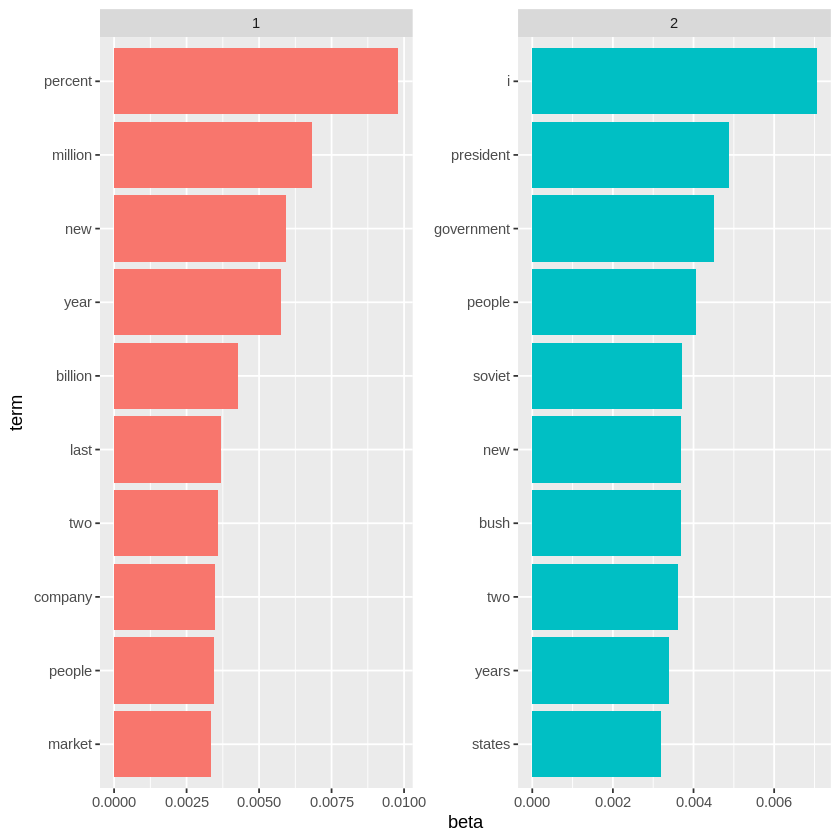

In [ ]:
# ============================================================
# Step 3 - 3: Statistic measurement from LDA() - beta
# find the 10 terms that are most common within each topic
# ============================================================


#  slice_max(data, order_by, n, with_ties = TRUE)
#   Function       : Selects the rows with the highest values of a specified variable.
#                    This is part of the 'dplyr' package, often used for ranking or
#                    extracting top observations.
#
#   data           : A data frame or tibble from which to select rows.
#
#   order_by       : (Required) Column used to order the rows in descending order.
#                    The highest values of this column are kept.
#
#   n              : Number of top rows to return (integer).
#                    For grouped data frames, returns the top `n` per group.
#
#   with_ties      : Logical; if TRUE (default), keeps all rows with values tied for
#                    the last rank included. If FALSE, returns exactly `n` rows.
#
#   Returns        : A tibble containing the top `n` rows according to `order_by`.
#   Output         : Useful for ranking, filtering top terms, topics, or other values
#                    within tidy data pipelines.
#--------------------------------------------------------------------------------
#   beta           : The column used to order the data — typically contains the
#                    term-topic probabilities (P(term | topic)) from a tidied LDA model.
#                    Since this command is often used after 'group_by(topic)', it finds
#                    the top words per topic.
#
#   n = 10         : Specifies that the top 10 rows (highest 'beta' values) should be returned.
#                    In the LDA context, this gives the 10 most probable words for each topic.


#  arrange(data, ..., .by_group = FALSE)
#   Function       : Reorders the rows of a data frame (or tibble) according to one or
#                    more variables. Provided by the 'dplyr' package.
#
#   data           : A data frame or tibble whose rows you want to reorder.
#
#   ...            : One or more variables or expressions to sort by.
#                      - Use ascending order by default.
#                      - Use a minus sign (-) in front of a variable for descending order.
#
#   .by_group      : Logical; if TRUE, and the data is grouped (via group_by()), sorting
#                    occurs within each group instead of globally.
#
#   Returns        : A tibble with rows rearranged based on the specified sort order.
#   Output         : Commonly used to rank or display values in descending or ascending order.
#--------------------------------------------------------------------------------
#   topic          : First sorting key — arranges rows by topic number (ascending by default),
#                    so all rows for topic 1 appear before topic 2, and so on.
#
#   -beta          : Second sorting key — arranges rows within each topic by descending
#                    'beta' values (the term probabilities). The minus sign (-) reverses
#                    the sort order to show the highest probabilities first.



#  reorder_within(x, by, within, fun = mean, desc = TRUE, sep = "___")
#   Function       : Reorders (re-ranks) factor levels of a variable 'x' within each level
#                    of another variable 'within'. Provided by the 'tidytext' package.
#                    It is commonly used to control the order of categories when plotting
#                    faceted bar charts (e.g., top terms per topic) in ggplot2.
#
#   x              : The categorical variable whose order you want to modify (usually a
#                    factor or character vector, e.g., 'term').
#
#   by             : The numeric variable to order 'x' by (e.g., 'beta' or frequency count).
#                    This determines the ranking of 'x' within each subgroup defined by
#                    'within'.
#
#   within         : The grouping variable (e.g., 'topic' or 'category') that defines
#                    separate ordering contexts. Each group will have its own internal
#                    ranking of 'x'.
#
#   fun            : The summary function applied to 'by' for ordering (default is 'mean').
#                    Generally not changed when reordering categorical data for plotting.
#
#   desc           : Logical; if TRUE (default), sorts in descending order of 'by'.
#                    If FALSE, sorts in ascending order.
#
#   sep            : Character string used to separate the values of 'x' and 'within' in
#                    the combined factor labels. The default "___" separator allows
#                    later reordering or separation using 'scale_x_reordered()'.
#
#   Returns        : A modified factor variable whose levels are reordered within each
#                    subgroup of 'within'. The result includes the separator ('sep')
#                    in its labels to preserve distinct rankings across facets.
#
#   Output         : Commonly used with faceted ggplot2 visualizations (e.g.,
#                    'facet_wrap(~ topic)') to ensure terms are properly ordered
#                    within each facet. Must be paired with 'scale_x_reordered()' or
#                    'scale_y_reordered()' to display clean axis labels.
#--------------------------------------------------------------------------------
#   x              : Variable to reorder (e.g., term names on the axis).
#
#   by             : Numeric variable used for sorting (e.g., topic-term probability 'beta').
#
#   within         : Grouping variable (e.g., topic) that defines separate reorder contexts.
#
#   sep            : Separator string (default "___") — used internally to avoid overlapping
#                    factor levels across different groups.


ap_top_terms <- ap_topics %>%
                group_by(topic) %>%
                slice_max(beta, n = 10) %>%
                ungroup() %>%
                arrange(topic, -beta)


ap_top_terms %>%
  mutate(term = reorder_within(term, beta, topic)) %>%
  ggplot(aes(beta, term, fill = factor(topic))) +
    geom_col(show.legend = FALSE) +
    facet_wrap(~topic, scales = "free") +
    scale_y_reordered()


This visualization lets us understand the two topics that were extracted from the articles.

1. The most common words in **topic 1** include “percent”, “million”, “billion”, and “company”, which suggests it may represent business or financial news.
2. Those most common in **topic 2** include “president”, “government”, and “soviet”, suggesting that this topic represents political news.
3. One **important observation** about the words in each topic is that some words, such as “new” and “people”, are common *within both topics*. This is an advantage of topic modeling as opposed to “hard clustering” methods: topics used in natural language could have some overlap in terms of words
4. As an alternative, we could consider the terms that had the **greatest difference** in 𝛽 **between topic 1 and topic 2**. This can be estimated based on the log ratio of the two: log2(𝛽2/𝛽1) (a log ratio is useful because it makes the difference symmetrical: 𝛽2 being twice as large leads to a log ratio of 1, while 𝛽1 being twice as large results in -1)
5. To constrain it to a set of especially relevant words, we can filter for relatively common words, such as those that have a 𝛽 greater than 1/1000 in at least one topic

In [ ]:
# ============================================================
# Step 3-4: Statistic measurement from LDA() - beta
# find the words with the greatest differences between the two topics
# ============================================================

#  paste0(..., collapse = NULL)
#   Function       : Concatenates multiple strings together without any separator.
#                    Provided by base R. Similar to 'paste()', but with 'sep = ""' by default,
#                    meaning it joins elements directly without spaces or delimiters.
#
#   ...            : One or more character vectors or objects that can be coerced to character.
#                    Each element in '...' is concatenated elementwise.
#
#   collapse       : Optional; if supplied, concatenates all results into a single string,
#                    using the specified string as a separator between combined elements.
#                    Default is NULL (no collapsing).
#
#   Returns        : A character vector created by joining corresponding elements from the
#                    input arguments, without any separator between them.
#
#   Output         : Commonly used to create dynamic labels, IDs, or variable names by
#                    joining a fixed text prefix/suffix to a variable or number.
#--------------------------------------------------------------------------------
#   "topic"        : The fixed character string prefix to be added before each topic number.
#
#   topic          : A variable (numeric or character) containing topic identifiers.
#
#   paste0("topic", topic) :
#                    Concatenates the string "topic" with the value of 'topic' (e.g., 1, 2, 3),
#                    producing labels such as "topic1", "topic2", "topic3".
#
#   Example        :
#                    topic <- 1:3
#                    paste0("topic", topic)
#                    # Output: "topic1" "topic2" "topic3"


beta_wide <- ap_topics %>%
  mutate(topic = paste0("topic", topic)) %>%
  pivot_wider(names_from = topic, values_from = beta) %>%
  filter(topic1 > .001 | topic2 > .001) %>%
  mutate(log_ratio = log2(topic2 / topic1))

top_terms <- beta_wide %>%
  arrange(abs(log_ratio)) %>%
  tail(20)

top_terms

term,topic1,topic2,log_ratio
<chr>,<dbl>,<dbl>,<dbl>
bush,8.187697e-07,3.696676e-03,12.14048
prison,1.953828e-07,1.110207e-03,12.47224
fell,1.417424e-03,2.086755e-07,-12.72972
presidential,2.860594e-08,1.044092e-03,15.15557
rate,1.523757e-03,1.095085e-08,-17.08623
prices,2.640072e-03,1.202698e-08,-17.74394
senate,4.626253e-09,1.402535e-03,18.20976
campaign,3.486392e-10,1.733693e-03,22.24561
vote,1.183521e-10,1.184366e-03,23.25453


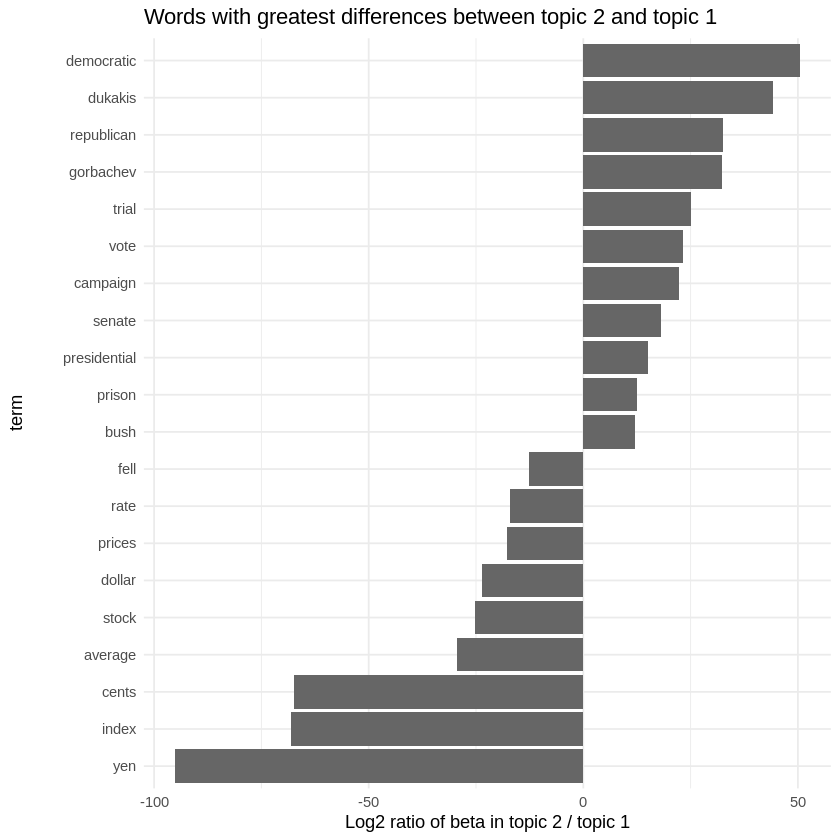

In [ ]:
# ============================================================
# Step 3-5: Visualization on the statistic measurement from LDA() - beta
# find the words with the greatest differences between the two topics
# ============================================================


ggplot(top_terms, aes(x = log_ratio, y = reorder(term, log_ratio))) +
  geom_col(fill = "gray40") +
  labs(
        y = "term",
        x = "Log2 ratio of beta in topic 2 / topic 1",
        title = "Words with greatest differences between topic 2 and topic 1"
      ) +
  theme_minimal()


1. We can see that the words more common in **Topic 2** (top) include political parties such as “democratic” and “republican”, as well as politician’s names such as “dukakis” and “gorbachev”.

2. **Topic 1** (bottom) was more characterized by currencies like “yen” and “dollar”, as well as financial terms such as “index”, “prices” and “rates”.

3. This helps implying that the two topics the algorithm identified were **political** and **financial** news.

##### 3.2.3 Document-topic probabilities (γ)

* The goal is to examine the per-document-per-topic probabilities, called 𝛾 (“gamma”), with the `matrix = "gamma"` argument to `tidy()`.

In [ ]:
# ============================================================
# Step 3-6: Statistic measurement from LDA() - gamma
# Similiar to the function from Step 3-2
# ============================================================

ap_documents <- tidy(ap_lda, matrix = "gamma")
head(ap_documents)

document,topic,gamma
<int>,<int>,<dbl>
1,1,0.2480616686
2,1,0.3615485445
3,1,0.5265844180
4,1,0.3566530023
5,1,0.1812766762
6,1,0.0005883388


Each of these values is an estimated proportion of words from that document that are generated from that topic. For example, the model estimates that only about 24.80% of the words in document 1 were generated from topic 1.

We can see that many of these documents were drawn from a mix of the two topics, but that document 6 was drawn almost entirely from topic 2, having a 𝛾 from topic 1 close to zero.

## [4. Intro to LDA() - Dataset 2](#lda2)

In Section 3, when using the ``AssociatedPress`` dataset, we do not know which topic(s) each document (news article) belongs to. In this section, we use the ``gutenbergr`` dataset, where the chapters and books are known. Suppose a vandal has broken into your study and torn apart four of your books:

- Great Expectations by Charles Dickens
- The War of the Worlds by H.G. Wells
- Twenty Thousand Leagues Under the Sea by Jules Verne
- Pride and Prejudice by Jane Austen

This vandal has torn the books into individual chapters, and left them in one large pile. How can we restore these disorganized chapters to their original books? This is a challenging problem since the individual chapters are **unlabeled**: we don’t know what words might distinguish them into groups. We’ll thus use topic modeling to discover how chapters cluster into distinct topics, each of them (presumably) representing one of the books


In [ ]:
# ============================================================
# Step 4-1: Gutenberg data
# Download, preprocess, tokenize, remove stopwords, and count the frequency
# ============================================================


# titles <- c("Twenty Thousand Leagues under the Sea",
#             "Pride and Prejudice",
#             "Great Expectations")

titles <- c("Twenty Thousand Leagues under the Sea",
            "The War of the Worlds",
            "Pride and Prejudice",
            "Great Expectations")

# we have the following code explained from the previous colab notebooks

books <- gutenberg_download(gutenberg_id = c(36, 1342, 1400, 164),
                            meta_fields = "title", "http://mirror.csclub.uwaterloo.ca/gutenberg/")
by_chapter <- books %>%
  group_by(title) %>%
  mutate(chapter = cumsum(str_detect(text, regex("^chapter ", ignore_case = TRUE)))) %>%
  ungroup() %>%
  filter(chapter > 0) %>%
  unite(document, title, chapter)

by_chapter_word <- by_chapter %>%
                  unnest_tokens(word, text)

word_counts <- by_chapter_word %>%
                anti_join(stop_words) %>%
                count(document, word, sort = TRUE)

Joining with `by = join_by(word)`


###4.1 Applying ``LDA()`` to Book Chapters for Topic Analysis
Right now our data frame word_counts is in a tidy form, but the topicmodels package requires a `DocumentTermMatrix` for calling ``LDA()``.


In [ ]:
# ============================================================
# Step 4-2: Formatting into DocumentTermMatrix
# ============================================================

#  cast_dtm(data, document, word, n)
#   Function       : Converts a tidy text data frame (one-token-per-row format) into a
#                    DocumentTermMatrix (DTM) — a sparse matrix used for text mining
#                    and topic modeling. Provided by the 'tidytext' package.
#
#   data           : A data frame or tibble containing at least three columns — one
#                    identifying the document, one containing tokens (words), and one
#                    with their counts. Typically created using 'unnest_tokens()' and
#                    'count()' in tidytext workflows.
#
#   document       : The column name (unquoted) that identifies each document.
#                    Each unique value becomes a row in the resulting matrix.
#
#   word           : The column name (unquoted) that identifies each term or token.
#                    Each unique term becomes a column in the matrix.
#
#   n              : The column name (unquoted) that provides the numeric term frequency
#                    or count values used to populate the matrix cells.
#
#   Returns        : A sparse matrix of class 'DocumentTermMatrix' (from the 'tm' package),
#                    with documents as rows, terms as columns, and term frequencies as entries.
#
#   Output         : Commonly used as input for topic modeling functions (e.g., 'LDA()')
#                    or other text-mining methods that require a DTM.
#--------------------------------------------------------------------------------
#   word_counts    : The tidy dataset piped into 'cast_dtm()', often containing columns
#                    'document', 'word', and 'n'.
#
#   document       : Defines the row dimension — one row per document ID.
#
#   word           : Defines the column dimension — one column per unique word.
#
#   n              : Defines the cell values — frequency of each word in each document.


chapters_dtm <- word_counts %>% cast_dtm(document, word, n)

chapters_dtm

<<DocumentTermMatrix (documents: 166, terms: 16528)>>
Non-/sparse entries: 90977/2652671
Sparsity           : 97%
Maximal term length: 19
Weighting          : term frequency (tf)

In [ ]:
# ============================================================
# Step 4-3: LDA()
# Similiar to step 3-1
# ============================================================

chapters_lda <- LDA(chapters_dtm, k = 3, control = list(seed = 1234))
chapters_lda

A LDA_VEM topic model with 3 topics.

### 4.2. Word-topic probabilities (&beta;)
The goal is to extract the per-topic-per-word probabilities, called 𝛽 (“beta”), from the model.

In [ ]:
# ============================================================
# Step 4-4: beta: per-topic-per-word probabilities
# Similiar to step 3-1
# ============================================================

chapter_topics <- tidy(chapters_lda, matrix = "beta")
head(chapter_topics)

topic,term,beta
<int>,<chr>,<dbl>
1,joe,1.222574e-02
2,joe,4.766140e-42
3,joe,7.491654e-93
1,biddy,4.028133e-03
2,biddy,6.060555e-53
3,biddy,2.363354e-113


Notice that ``chapter_topics`` is a one topic per term per row format.

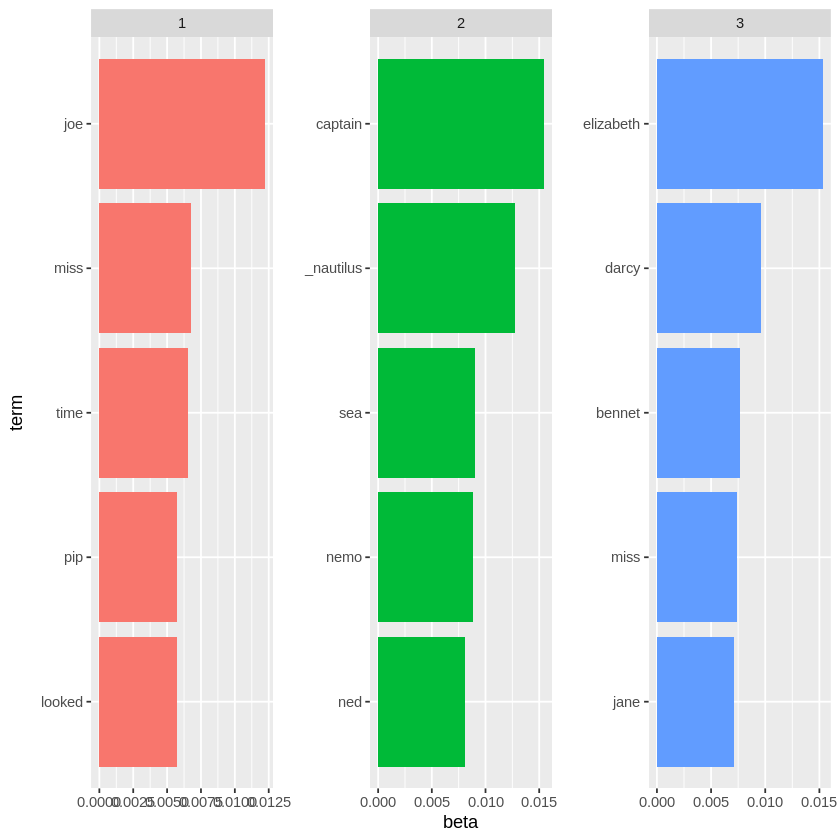

In [ ]:
# ============================================================
# Step 4-5: Statistic measurement from LDA() - beta
# Similiar to step 3-2
# ============================================================

top_terms <- chapter_topics %>%
  group_by(topic) %>%
  slice_max(beta, n = 5) %>%
  ungroup() %>%
  arrange(topic, -beta)

# head(top_terms)

top_terms %>%
  mutate(term = reorder_within(term, beta, topic)) %>%
        ggplot(aes(beta, term, fill = factor(topic))) +
        geom_col(show.legend = FALSE) +
        facet_wrap(~ topic, scales = "free") +
        scale_y_reordered()

### 4.3. Document-topic probabilities (γ)

Each document in this analysis represented a single chapter. Thus, we may want to know which topics are **associated with** each document => Can we put the chapters back together in the correct books?

We can find this by examining the per-document-per-topic probabilities, 𝛾 (“gamma”)

In [ ]:
# ============================================================
# Step 4-6: Statistic measurement from LDA() - gamma
# Similiar to the function from step 3-6
# ============================================================

chapters_gamma <- tidy(chapters_lda, matrix = "gamma")

head(chapters_gamma)

chapters_gamma <- chapters_gamma %>%
  separate(document, c("title", "chapter"), sep = "_", convert = TRUE)

head(chapters_gamma)

document,topic,gamma
<chr>,<int>,<dbl>
Great Expectations_57,1,0.9980395
Great Expectations_7,1,0.9999664
Great Expectations_17,1,0.9999508
Great Expectations_27,1,0.9999551
Great Expectations_38,1,0.9999696
Great Expectations_2,1,0.9983999


title,chapter,topic,gamma
<chr>,<int>,<int>,<dbl>
Great Expectations,57,1,0.9980395
Great Expectations,7,1,0.9999664
Great Expectations,17,1,0.9999508
Great Expectations,27,1,0.9999551
Great Expectations,38,1,0.9999696
Great Expectations,2,1,0.9983999


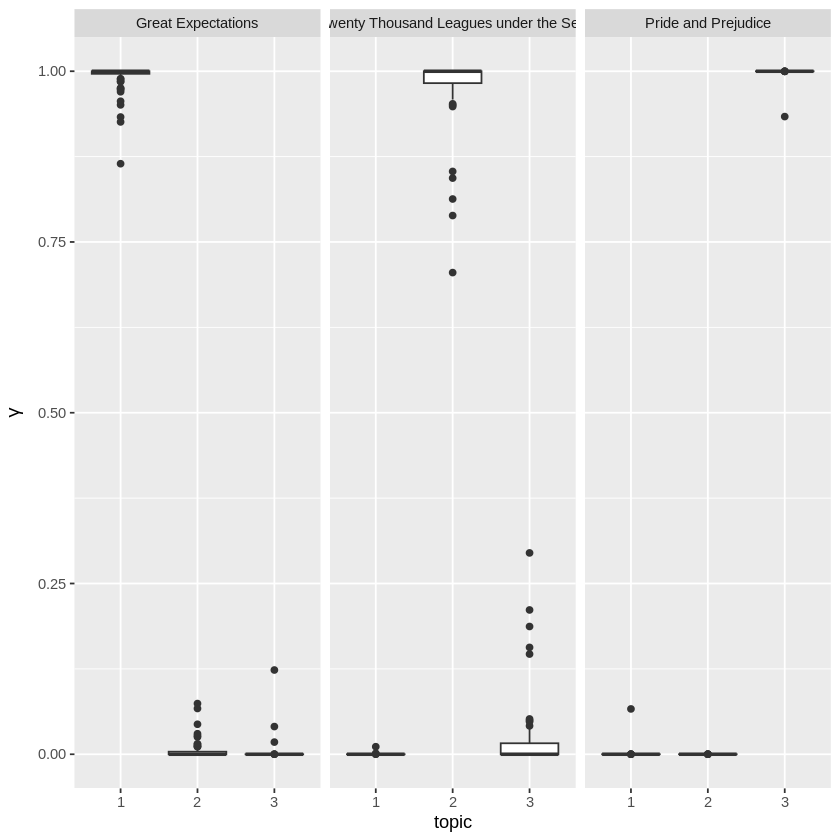

In [ ]:
# ============================================================
# Step 4-7: Visualization on LDA() - gamma
# ============================================================

# reorder titles in order of topic 1, topic 2, etc before plotting
chapters_gamma %>%
  mutate(title = reorder(title, gamma * topic)) %>%
  ggplot(aes(factor(topic), gamma)) +
        geom_boxplot() +
        facet_wrap(~ title) +
        labs(x = "topic", y = expression(gamma))

We notice that almost all of the chapters from **Pride and Prejudice** and **Twenty Thousand Leagues Under the Sea** were uniquely identified as a single topic each.

It does look like some chapters from **Great Expectations** were somewhat associated with other topics. Are there any cases where the topic most associated with a chapter belonged to another book?

First we’d find the topic that was most associated with each chapter using ``slice_max()``, which is effectively the “classification” of that chapter.

In [ ]:
# ============================================================
# Step 4-8: LDA() - gamma: assigns each chapter to its most likely topic
# based on the highest gamma value predicted by the topic model.
# ============================================================

chapter_classifications <- chapters_gamma %>%
                            group_by(title, chapter) %>%
                            slice_max(gamma) %>%
                            ungroup()

head(chapter_classifications)


title,chapter,topic,gamma
<chr>,<int>,<int>,<dbl>
Great Expectations,1,1,0.9999239
Great Expectations,2,1,0.9983999
Great Expectations,3,1,0.9999254
Great Expectations,4,1,0.9999611
Great Expectations,5,1,0.9999658
Great Expectations,6,1,0.9998139


In [ ]:
# ============================================================
# Step 4-9: LDA() - gamma: identify the dominant topic for each topic
# ============================================================

#  transmute(data, ...)
#   Function       : Creates a new data frame (or tibble) that includes only the newly
#                    created or transformed variables specified in the expression.
#                    Provided by the 'dplyr' package. Unlike 'mutate()', it discards all
#                    existing columns that are not explicitly created in the call.
#
#   data           : The input data frame or tibble being piped in through '%>%'.
#
#   ...            : One or more expressions used to create or rename variables.
#                    - You can rename variables using 'new_name = existing_column'.
#                    - You can create computed variables using expressions.
#                    - Only the specified variables are kept in the output.
#
#   Returns        : A tibble containing only the variables defined in the transmute call.
#
#   Output         : Used when you want to transform and select specific columns at the
#                    same time, keeping only the newly created variables.
#--------------------------------------------------------------------------------
#   data           : The data set produced by the previous pipeline step (e.g., augmented
#                    LDA output or a tibble with document-topic assignments).
#
#   consensus = title :
#                    Renames the existing variable 'title' to 'consensus' in the output.
#                    This creates a new column 'consensus' containing the same values
#                    as 'title'.
#
#   topic          : Keeps the existing variable 'topic' (e.g., the topic number assigned
#                    to each document) in the output.

book_topics <- chapter_classifications %>%
  count(title, topic) %>%
  group_by(title) %>%
  slice_max(n, n = 1) %>%
  ungroup() %>%
  transmute(consensus = title, topic)

head(book_topics)



consensus,topic
<chr>,<int>
Great Expectations,1
Pride and Prejudice,3
Twenty Thousand Leagues under the Sea,2


### 4.4 By word assignments: `augment`

One step of the LDA algorithm is assigning each word in each document to a topic. The more words in a document are assigned to that topic, generally, the more weight  &gamma; will go on that document-topic classification

* We may want to take the original document-word pairs and find which words in each document were assigned to which topic

* This is the job of the `augment()` function, which also originated in the broom package as a way of tidying model output

* While `tidy()` retrieves the statistical components of the model, `augment()` uses a model to add information to each observation in the original data

In [ ]:
# ============================================================
# Step 4-10: LDA - Post-processing step
# ============================================================

chapters_lda

#  augment(x, data, ...)
#   Function       : Adds model outputs (such as fitted values, topic probabilities,
#                    or residuals) back to the original data. Provided by the 'broom'
#                    or 'broom.mixed' packages. For topic models like LDA objects from
#                    'topicmodels', 'augment()' appends per-document topic probabilities
#                    (γ values) to each document in the dataset.
#
#   x              : A model object — here, an 'LDA' object (e.g., 'chapters_lda')
#                    created by the 'LDA()' function from the 'topicmodels' package.
#                    Represents a fitted topic model containing document–topic and
#                    term–topic distributions.
#
#   data           : The original data used to fit the model — typically a
#                    'DocumentTermMatrix' (e.g., 'chapters_dtm'). This provides the
#                    structure (documents × terms) to which the model’s inferred topic
#                    probabilities are matched.
#
#   ...            : Additional arguments passed to methods (optional; rarely used
#                    for basic topic modeling applications).
#
#   Returns        : A tibble where each row corresponds to a document from 'data', and
#                    additional columns contain the topic assignments or topic
#                    probabilities (γ values) generated by the LDA model.
#
#   Output         : Useful for analyzing, visualizing, or joining per-document topic
#                    distributions with document metadata. Often followed by
#                    'tidy()', 'group_by()', or 'ggplot()' for further analysis.
#--------------------------------------------------------------------------------
#   chapters_lda   : The fitted LDA model containing estimated topic distributions.
#
#   data = chapters_dtm :
#                    Specifies the document-term matrix used during model fitting.
#                    Ensures the augmented output correctly aligns the inferred
#                    topic probabilities with the corresponding documents.
#

# convert DTM to tibble dataframe
assignments <- augment(chapters_lda, data = chapters_dtm)
head(assignments)


assignments <- assignments %>%
  separate(document, c("title", "chapter"), sep = "_", convert = TRUE) %>%
  inner_join(book_topics, by = c(".topic" = "topic"))


A LDA_VEM topic model with 3 topics.

document,term,count,.topic
<chr>,<chr>,<dbl>,<dbl>
Great Expectations_57,joe,88,1
Great Expectations_7,joe,70,1
Great Expectations_17,joe,5,1
Great Expectations_27,joe,58,1
Great Expectations_2,joe,56,1
Great Expectations_23,joe,1,1


* This combination of the true book `(title)` and the book assigned to it `(consensus)` is useful for further exploration.

* We can, for example, visualize a confusion matrix, showing how often words from one book were assigned to another, using dplyr’s `count()` and ggplot2’s `geom_tile`

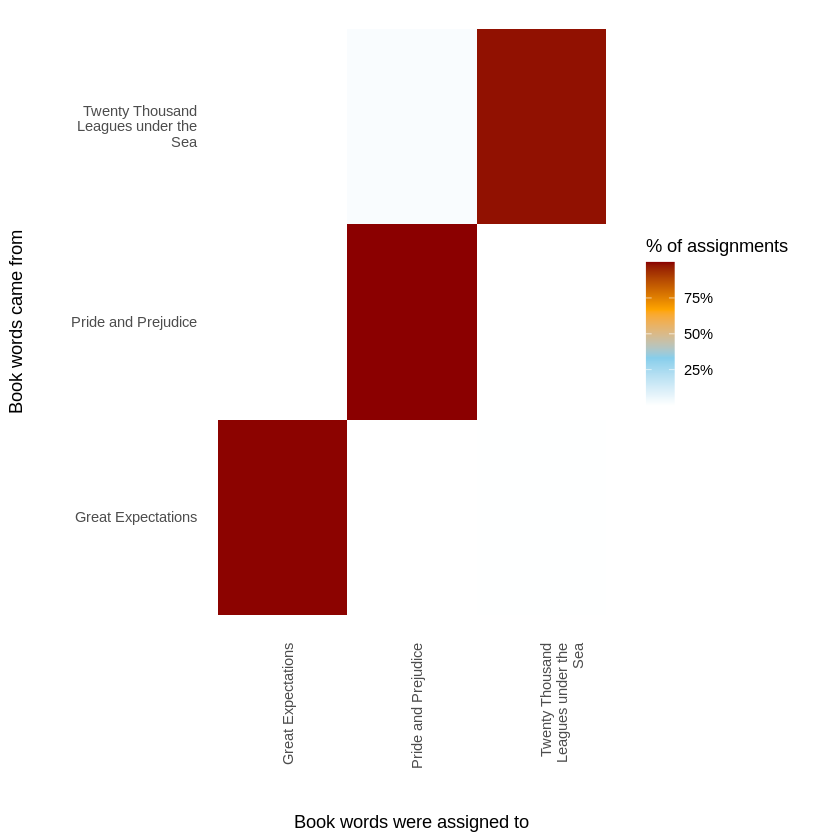

In [ ]:
# ============================================================
# Step 4-11: Apply LDA() - visualize the ground truth vs prediction
# ============================================================

#  count(data, ..., wt = NULL, sort = FALSE, name = NULL)
#   Function       : Counts the number of occurrences for each combination of the specified
#                    variables. Provided by the 'dplyr' package. Returns a tibble with
#                    unique combinations of grouping variables and their corresponding counts.
#
#   data           : A data frame or tibble to summarize. When using the pipe operator (%>%),
#                    this argument is supplied implicitly by the preceding step.
#
#   ...            : One or more unquoted variable names to group by before counting.
#                    Each unique combination of these variables will form one row in
#                    the output tibble.
#
#   wt             : (Optional) A weighting variable. Instead of counting rows, 'count()'
#                    will sum the values of this variable for each group. Commonly used
#                    when a pre-existing count or frequency column is available.

#  across(.cols, .fns, ..., .names = NULL)
#   Function       : Applies one or more functions to multiple columns at once.
#                    Provided by the 'dplyr' package. Used inside 'mutate()', 'summarize()',
#                    'transmute()', or 'reframe()' to perform transformations across
#                    several variables simultaneously.
#
#   .cols          : The columns to which the function(s) will be applied.
#                    - Can be specified using 'c(column1, column2, ...)' for explicit selection.
#                    - Supports tidyselect helpers like 'starts_with()', 'contains()', etc.
#
#   .fns           : The function (or list of functions) to apply to the selected columns.
#                    Can be written as an anonymous formula using '~' (tilde) notation.
#
#   ...            : Additional arguments passed to the function(s) specified in '.fns'.
#
#   .names         : (Optional) A string template to name the resulting columns.
#                    Defaults to overwriting the original columns when '.fns' is a single function.
#
#   Returns        : A tibble or data frame with the same number of rows as the input.
#                    Columns selected in '.cols' are replaced or expanded with the transformed values.
#
#   Output         : Commonly used to apply consistent formatting or computations to
#                    multiple columns at once (e.g., scaling, rounding, string wrapping).
#--------------------------------------------------------------------------------
#   across(c(title, consensus), ~str_wrap(., 20)) :
#                    Applies the 'str_wrap()' function to both the 'title' and 'consensus'
#                    columns, wrapping long text into multiple lines with a maximum width
#                    of 20 characters per line.
#
#   c(title, consensus) :
#                    Specifies that the transformation should be applied to both columns
#                    'title' and 'consensus' simultaneously.
#
#   ~str_wrap(., 20) :
#                    Anonymous function that takes each selected column (represented by '.')
#                    and applies 'str_wrap()' from the 'stringr' package.
#                    - '.' represents the column being processed.
#                    - '20' specifies the maximum line width (20 characters).
#
#   str_wrap()      : Provided by the 'stringr' package, this function inserts line breaks
#                    into long strings to ensure text wraps neatly when displayed in plots
#                    or printed outputs.



assignments %>%
  count(title, consensus, wt = count) %>%
  mutate(across(c(title, consensus), ~str_wrap(., 20))) %>%
  group_by(title) %>%
  mutate(percent = n / sum(n)) %>%
  ggplot(aes(consensus, title, fill = percent)) +
      geom_tile() +
      # scale_fill_gradient2(high = "darkred", label = percent_format()) +
      scale_fill_gradientn(
                            colours = c("white", "skyblue", "orange", "darkred"),
                            values = scales::rescale(c(0, 0.2, 0.4, 0.6, 0.8, 1)),  # specify breakpoints
                            labels = scales::percent_format()
                          ) +  # change the colormap
      theme_minimal() +
      theme(axis.text.x = element_text(angle = 90, hjust = 1),
            panel.grid = element_blank()) +
      labs(x = "Book words were assigned to",
          y = "Book words came from",
          fill = "% of assignments")

* Confusion matrix showing where LDA assigned the words from each book. Each row of this table represents the **true book** (ground truth) each word came from, and each column represents what book it was **assigned to** based on the probabilities.

* We notice that almost all the words for Pride and Prejudice and Great Expectations were correctly assigned, while Twenty Thousand Leagues Under the Sea had a fair number of misassigned words.

* What were the most commonly mistaken words?

In [ ]:
# ============================================================
# Step 4-12: Apply LDA() - filter for the mistaken assignments
# ============================================================

wrong_words <- assignments %>%
                filter(title != consensus)

head(wrong_words)

title,chapter,term,count,.topic,consensus
<chr>,<int>,<chr>,<dbl>,<dbl>,<chr>
Twenty Thousand Leagues under the Sea,20,miss,1,3,Pride and Prejudice
Twenty Thousand Leagues under the Sea,35,miss,1,3,Pride and Prejudice
Twenty Thousand Leagues under the Sea,28,miss,1,1,Great Expectations
Twenty Thousand Leagues under the Sea,8,miss,1,3,Pride and Prejudice
Great Expectations,46,captain,1,2,Twenty Thousand Leagues under the Sea
Great Expectations,32,captain,1,2,Twenty Thousand Leagues under the Sea


In [ ]:
# ============================================================
# Step 4-13: Apply LDA() - grouped count for the mistaken assignments
# ============================================================

wrong_words2 <- wrong_words %>%
                count(title, consensus, term, wt = count) %>%
                ungroup() %>%
                arrange(desc(n))

head(wrong_words2, 10)

title,consensus,term,n
<chr>,<chr>,<chr>,<dbl>
Great Expectations,Pride and Prejudice,jane,12
Great Expectations,Twenty Thousand Leagues under the Sea,land,6
Twenty Thousand Leagues under the Sea,Pride and Prejudice,company,6
Twenty Thousand Leagues under the Sea,Pride and Prejudice,letter,6
Great Expectations,Twenty Thousand Leagues under the Sea,floating,5
Great Expectations,Twenty Thousand Leagues under the Sea,depth,4
Twenty Thousand Leagues under the Sea,Pride and Prejudice,1500,4
Twenty Thousand Leagues under the Sea,Pride and Prejudice,convinced,4
Twenty Thousand Leagues under the Sea,Pride and Prejudice,object,4


* We can see that a number of words were often assigned to the Pride and Prejudice even when they appeared in Great Expectations, for example, ``Jane``

In [ ]:
# ============================================================
# Step 4-14: Apply LDA() - grouped count for true assignments
# ============================================================

word_counts %>%
  filter(word == "flopson")

document,word,n
<chr>,<chr>,<int>
Great Expectations_22,flopson,10
Great Expectations_23,flopson,7
Great Expectations_33,flopson,1


* On the other hand, there are a few wrongly classified words that never appeared in the novel they were misassigned to. For example, we can confirm “flopson” appears only in Great Expectations, even though it’s assigned to the “Pride and Prejudice” cluster

## [5. Advanced Topic for LDA and TF-IDF using Customized Functions](#Data3)


Natural Language Processing (usually shortened to “NLP”) is the task of automatically extracting and summarizing information from text data. In this section, we focus on using topic modeling for NLP tasks.


**Topic modeling:** The NLP task of identifying automatically identifying major themes in a text, usually by identifying informative words. There are two main uses for topic modeling.

  1. The first is to help in identifying major topics in unlabeled texts. You can think of it as a replacement for word clouds to help you understand the recurring themes in a text

  2. The second use is to identify which words are important for text that is labeled for topic. In this tutorial we’ll practice both kinds of topic modeling

**Data:** In this section, we will use the dataset ``deceptive-opinion.csv``



In [ ]:
# ============================================================
# Step 5-1: Load the data
# ============================================================

reviews <- read_csv("deceptive-opinion.csv")
head(reviews, 2)

Rows: 1600 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): deceptive, hotel, polarity, source, text

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


deceptive,hotel,polarity,source,text
<chr>,<chr>,<chr>,<chr>,<chr>
truthful,conrad,positive,TripAdvisor,"We stayed for a one night getaway with family on a thursday. Triple AAA rate of 173 was a steal. 7th floor room complete with 44in plasma TV bose stereo, voss and evian water, and gorgeous bathroom(no tub but was fine for us) Concierge was very helpful. You cannot beat this location... Only flaw was breakfast was pricey and service was very very slow(2hours for four kids and four adults on a friday morning) even though there were only two other tables in the restaurant. Food was very good so it was worth the wait. I would return in a heartbeat. A gem in chicago..."
truthful,hyatt,positive,TripAdvisor,"Triple A rate with upgrade to view room was less than $200 which also included breakfast vouchers. Had a great view of river, lake, Wrigley Bldg. & Tribune Bldg. Most major restaurants, Shopping, Sightseeing attractions within walking distance. Large room with a very comfortable bed."


### 5.1. Using LDA (unsupervised approach)

Latent Dirichlet allocation, more commonly shortened to LDA, is one unsupervised way of doing topic modeling

> #### **Unsupervised**: In machine learning, a problem is unsupervised if you don’t have labeled examples of the thing you’re trying to figure out

LDA rests on the assumption that each document is going to have some subset of topics in it, and that each topic is associated with a certain subset of words. Imagine, for example, that you have three text ads:

- One is for Chow-Chow Crunch, a new dog food
- One is for Danny’s Downhome Diner, a new restaurant
- One is for Fifi’s Chic Puppy Boutique, a store that sells dog accessories

Both the diner and the dog food ad will probably have words associated with the topic of food in them, like “tasty”, “filling” or “delicious”. Both the dog food and the pet store will probably have words associated with the topic of pets, like “canine”, “pet” or “owner”. And, because they’re all ads, it likely that all three documents will have words associated with advertising in them, like “sale”, “price” or “special”

The tricky part is that words can also belong to more than one topic. I just said that “special” could be associated with advertising… but it can also be associated with food, especially in terms like “blue plate special” or “chef’s special”

What LDA outputs, then, is two estimates:

1. An estimate of how much each topic contributes to each document
2. An estimate of how much each word contributes to each topic

For exploratory analysis, especially if you have a large number of documents, the second estimate is usually more interesting

In order to make our lives easier (since we’re going to ran an LDA several times) let’s write a function that takes a text column from a data frame and returns a plot of the most informative words for a given number of topics

In [ ]:
# ============================================================
# Step 5-2: Define a function for unsupervised learning using LDA()
# function to get & plot the most informative terms by a specificed number of topics, using LDA
# ============================================================

#  function_name <- function(arg1, arg2, ..., argN) {
#    # function body (code to execute)
#    # optional: return(value)
#  }
#
#   Function       : Defines a reusable block of code (a *function*) that takes one or more
#                    arguments as input, performs operations, and optionally returns a result.
#                    Functions in R are first-class objects that can be stored in variables,
#                    passed to other functions, or returned as outputs.
#
#   function_name  : The user-defined name that identifies the function.
#                    Naming conventions usually use lowercase letters and underscores.
#
#   <-              : Assignment operator that assigns the function object to a name.
#
#   function()      : Keyword used to declare a function. It defines a new function object.
#
#   arg1, arg2, ... : The function parameters (arguments). These are placeholders for values
#                    that will be passed to the function when it is called.
#                    - Arguments can have default values (e.g., arg1 = 10).
#                    - Arguments can be optional or required.
#
#   { ... }         : Curly braces define the *function body* — a block of R expressions
#                    that are executed when the function is called.
#                    Multiple expressions are executed sequentially.
#
#   return(value)   : Optional. Specifies what value the function should output.
#                    If omitted, the function automatically returns the value of the
#                    last evaluated expression.
#
#   Returns        : The output (result) produced by the function — can be any R object
#                    such as a vector, list, data frame, or plot.
#
#   Output         : Functions are used to encapsulate logic, avoid code repetition,
#                    and make workflows modular and reusable.
#--------------------------------------------------------------------------------

top_terms_by_topic_LDA <- function(input_text, plot = T, number_of_topics = 4)
                        {
                            # create a corpus (type of object expected by tm) and document term matrix
                            Corpus <- Corpus(VectorSource(input_text)) # make a corpus object
                            DTM <- DocumentTermMatrix(Corpus) # get the count of words/document

                            # remove any empty rows in our document term matrix (if there are any
                            # we'll get an error when we try to run our LDA)
                            unique_indexes <- unique(DTM$i) # get the index of each unique value
                            DTM <- DTM[unique_indexes,] # get a subset of only those indexes

                            # preform LDA & get the words/topic in a tidy text format
                            lda <- LDA(DTM, k = number_of_topics, control = list(seed = 1234))
                            topics <- tidy(lda, matrix = "beta")

                            # get the top ten terms for each topic
                            top_terms <- topics  %>% # take the topics data frame and..
                              group_by(topic) %>% # treat each topic as a different group
                              top_n(10, beta) %>% # get the top 10 most informative words
                              ungroup() %>% # ungroup
                              arrange(topic, -beta) # arrange words in descending informativeness

                            # if the user asks for a plot (TRUE by default)
                            if(plot == T){
                                # plot the top ten terms for each topic in order
                                top_terms %>% # take the top terms
                                  mutate(term = reorder(term, beta)) %>% # sort terms by beta value
                                  ggplot(aes(term, beta, fill = factor(topic))) + # plot beta by theme
                                  geom_col(show.legend = FALSE) + # as a bar plot
                                  facet_wrap(~ topic, scales = "free") + # represent each topic in a seperate plot
                                  labs(x = NULL, y = "Beta") + # no x label, change y label
                                  coord_flip() # turn bars sideways
                            }else{
                                # if the user does not request a plot
                                # return a list of sorted terms instead
                                return(top_terms)
                            }
                        }

#  top_terms_by_topic_LDA <- function(input_text, plot = T, number_of_topics = 4) { ... }
#   Function       : Defines a custom R function named 'top_terms_by_topic_LDA' that performs
#                    topic modeling using Latent Dirichlet Allocation (LDA) and returns or plots
#                    the top informative terms for each topic. Combines text preprocessing,
#                    model fitting, and visualization steps into one workflow.
#
#   input_text     : Character vector containing the input text documents to be analyzed.
#                    Each element represents a document (e.g., a chapter, paragraph, or article).
#
#   plot           : Logical flag (default = TRUE). Determines whether to produce a
#                    ggplot2 visualization of the top terms per topic.
#                    - If TRUE → generates a faceted bar plot.
#                    - If FALSE → returns a tidy data frame of top terms.
#
#   number_of_topics :
#                    Numeric argument (default = 4). Specifies the number of topics (k)
#                    to extract when fitting the LDA model.
#
#   Returns        : Either:
#                    1. A ggplot object showing the top 10 terms for each topic (if plot = TRUE), or
#                    2. A tibble of top terms and their β (beta) values per topic (if plot = FALSE).
#
#   Output         : Used for quick topic modeling of text data, providing both visual and
#                    tabular outputs for exploratory analysis.
#--------------------------------------------------------------------------------
#   Function Body  :
#
#   Corpus <- Corpus(VectorSource(input_text))
#                    - Converts the input text into a 'Corpus' object from the 'tm' package.
#                    - A corpus is a structured collection of text documents used in text mining.
#
#   DTM <- DocumentTermMatrix(Corpus)
#                    - Creates a Document–Term Matrix (rows = documents, columns = words, values = counts).
#                    - This is the required input format for 'LDA()' in the 'topicmodels' package.
#
#   unique_indexes <- unique(DTM$i)
#   DTM <- DTM[unique_indexes, ]
#                    - Removes empty rows (documents with zero word counts), preventing errors
#                      when fitting the LDA model.
#
#   lda <- LDA(DTM, k = number_of_topics, control = list(seed = 1234))
#                    - Fits a Latent Dirichlet Allocation model with k topics.
#                    - 'seed' ensures reproducibility of topic assignments.
#
#   topics <- tidy(lda, matrix = "beta")
#                    - Converts the LDA output into a tidy format using 'tidytext::tidy()'.
#                    - The 'beta' matrix represents P(term | topic) — the probability of a word
#                      given a topic.
#
#   top_terms <- topics %>%
#                  group_by(topic) %>%
#                  top_n(10, beta) %>%
#                  ungroup() %>%
#                  arrange(topic, -beta)
#                    - Groups the terms by topic.
#                    - Selects the 10 terms with the highest 'beta' per topic.
#                    - Arranges them in descending order of informativeness.
#
#   if (plot == T) {
#                    - Conditional branch: if the user requests a plot (default).
#
#     top_terms %>%
#       mutate(term = reorder(term, beta)) %>%
#       ggplot(aes(term, beta, fill = factor(topic))) +
#       geom_col(show.legend = FALSE) +
#       facet_wrap(~ topic, scales = "free") +
#       labs(x = NULL, y = "Beta") +
#       coord_flip()
#                    - Creates a faceted horizontal bar chart.
#                    - Each facet corresponds to one topic.
#                    - The x-axis shows the top terms, and bar lengths represent 'beta' values.
#
#   } else {
#       return(top_terms)
#                    - If plot = FALSE, the function returns a tidy tibble of the top 10 terms
#                      for each topic and their associated 'beta' values.
#   }
#
#--------------------------------------------------------------------------------
#   Example Usage  :
#                    text_data <- c("Machine learning improves prediction accuracy.",
#                                   "Topic models identify latent themes in text.",
#                                   "Deep learning revolutionizes natural language processing.")
#
#                    top_terms_by_topic_LDA(text_data, plot = TRUE, number_of_topics = 3)
#                    # → Produces a faceted bar chart of top words per topic.
#
#                    top_terms_by_topic_LDA(text_data, plot = FALSE)
#                    # → Returns a tibble of top terms and beta values per topic.


Now let’s try out our function on our dataset!

> ##### **But how do we know how many topics we should have?** You can’t be sure ahead of time unless you’re very familiar with the dataset and know how many topics you expect to see. Probably the most common way to figure out how many topics there are automatically is to train a lot of different models with different numbers of topics and then see which has the least uncertainty (generally measured by perplexity). This can be a bit resource-intensive, especially if you have a large corpus, so I’m not going to cover it in detail here. You can check out this [guide](https://info5940.infosci.cornell.edu/#perplexity) for more details if you’re curious

Since we know that this dataset contains deceptive and truthful reviews, we're going to specify that we want to know about two topics.

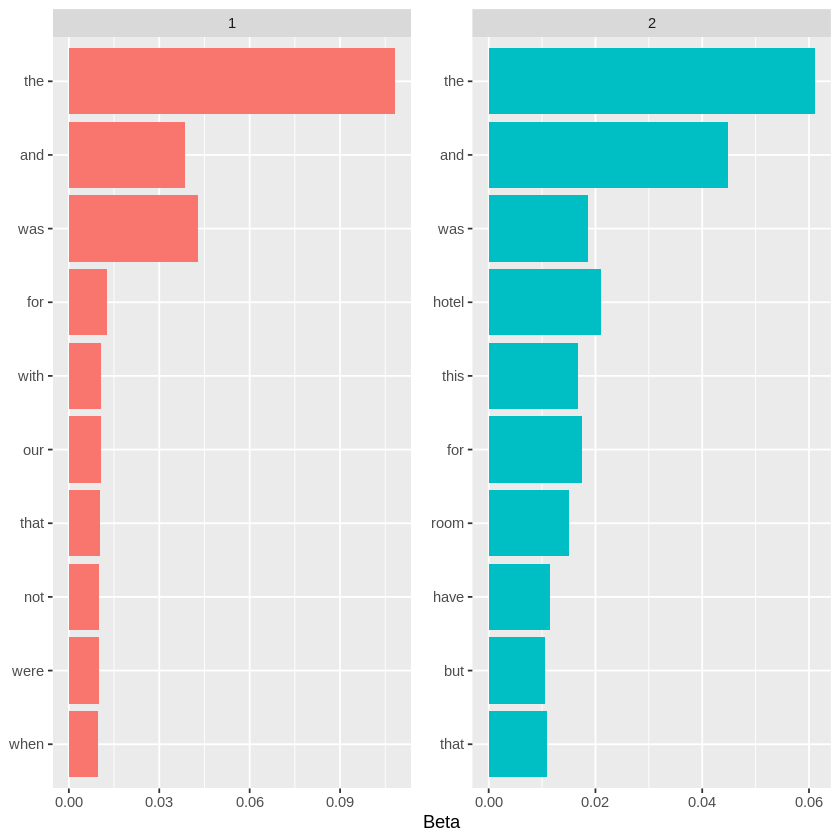

In [ ]:
# ============================================================
# Step 5-3: Call the customized function
# ============================================================

top_terms_by_topic_LDA(reviews$text, number_of_topics = 2)

* These topics aren’t actually very interesting or informative. This is because they include a lot of very common words that play important grammatical roles but don’t actually convey a lot of information.

* Our topic modelling will be a lot more useful if we remove these words.

### 5.2. Pre-processing text for more informative models

In the last section, we tried our hand at topic modelling uisng LDA and found that our models were not very informative becuase they had a lot of very common stopwords in them

> ##### **Stopwords**: Words that are very commonly used in a language but are not very informative. Examples of English stopwords include “the”, “of” and “and”. These are often removed during NLP tasks using a hand-curated list. We have stopword lists for many languages on Kaggle, including this one which has stopword lists for 19 languages

Let’s see if our topics are any more interesting if we try pre-processing our text data to remove stopwords. (I’m also going to remove both “hotel” and “room”, where are very common in hotel reviews.)

In [ ]:
# ============================================================
# Step 5-4: Preprocess the data
# ============================================================

#  VectorSource(x)
#   Function       : Creates a text source object from a character vector.
#                    Provided by the 'tm' (text mining) package. It serves as an input
#                    type for 'Corpus()' to construct a text corpus from R vectors.
#
#   x              : A character vector, where each element represents one document
#                    (e.g., a sentence, paragraph, or full text). Typically, this is a
#                    column from a data frame containing textual data (e.g., reviews$text).
#
#   Returns        : A 'VectorSource' object — a specialized data source class recognized
#                    by 'Corpus()' for creating text corpora. Each element of 'x' becomes
#                    an individual document in the corpus.
#
#   Output         : Used as the first step in corpus creation when text data are already
#                    available in memory as R character vectors.


#  Corpus(x, readerControl = list())
#   Function       : Constructs a 'Corpus' object — a structured collection of text documents
#                    used for text mining and natural language processing (NLP).
#                    Provided by the 'tm' package.
#
#   x              : A text source object that defines how to access the documents.
#                    - Common input types include 'VectorSource()', 'DirSource()', or
#                      'DataframeSource()'.
#                    - When using 'VectorSource()', each element of the character vector
#                      becomes one document in the corpus.
#
#   readerControl  : (Optional) A list of parameters controlling how documents are read.
#                    Typically left as default for in-memory text sources.
#
#   Returns        : A 'VCorpus' (Volatile Corpus) object — a structured, in-memory representation
#                    of text documents that can be preprocessed (e.g., cleaned, tokenized,
#                    stemmed) using various 'tm_map()' transformations.
#
#   Output         : A corpus object used as the foundation for creating a DocumentTermMatrix
#                    or performing text transformations (e.g., removing punctuation, stopwords).




# create a document term matrix to clean
reviewsCorpus <- Corpus(VectorSource(reviews$text))
reviewsDTM <- DocumentTermMatrix(reviewsCorpus)

# convert the document term matrix to a tidytext corpus
reviewsDTM_tidy <- tidy(reviewsDTM)

# I'm going to add my own custom stop words that I don't think will be
# very informative in hotel reviews
custom_stop_words <- tibble(word = c("hotel", "room"))

# remove stopwords
reviewsDTM_tidy_cleaned <- reviewsDTM_tidy %>% # take our tidy dtm and...
    anti_join(stop_words, by = c("term" = "word")) %>% # remove English stopwords and...
    anti_join(custom_stop_words, by = c("term" = "word")) # remove my custom stopwords

# reconstruct cleaned documents (so that each word shows up the correct number of times)
cleaned_documents <- reviewsDTM_tidy_cleaned %>%
    group_by(document) %>%
    mutate(terms = toString(rep(term, count))) %>%
    select(document, terms) %>%
    unique()

# check out what the cleaned documents look like (should just be a bunch of content words)
# in alphabetic order
head(cleaned_documents,2)

document,terms
<chr>,<chr>
1,"173, 44in, 7th, aaa, adults, bathroom(no, beat, bose, breakfast, chicago..., complete, concierge, evian, family, fine, flaw, floor, food, friday, gem, getaway, gorgeous, heartbeat., helpful., kids, location..., morning), night, plasma, pricey, rate, restaurant., return, service, slow(2hours, stayed, steal., stereo,, tables, thursday., triple, tub, us), voss, wait., water,, worth"
2,"$200, attractions, bed., bldg., bldg., breakfast, comfortable, distance., included, lake,, major, rate, restaurants,, river,, shopping,, sightseeing, tribune, triple, upgrade, view, view, vouchers., walking, wrigley"


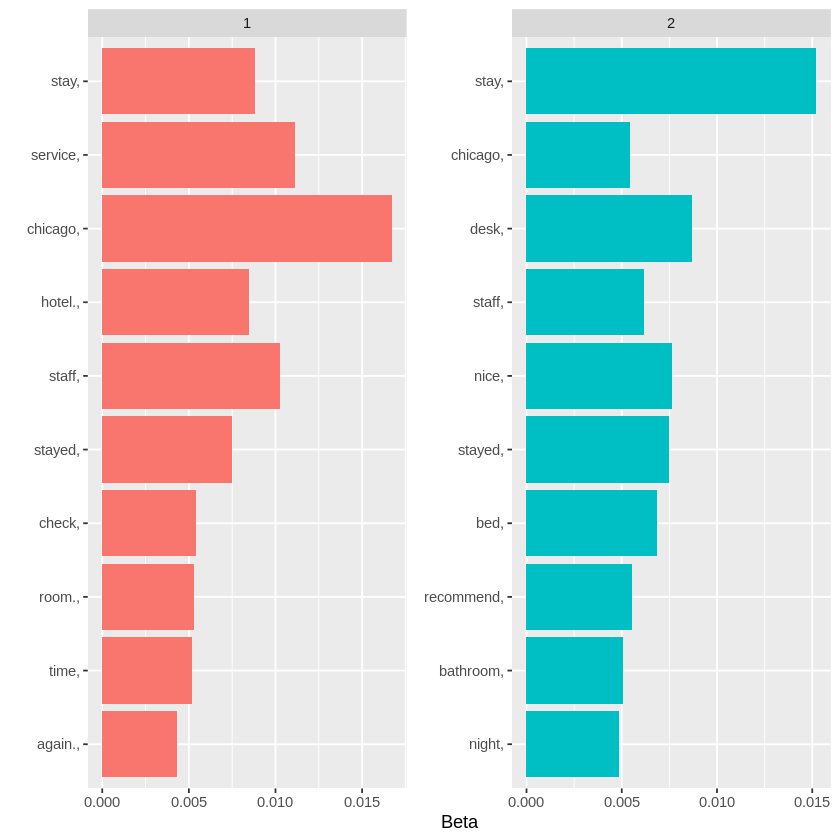

In [ ]:
# ============================================================
# Step 5-5: Call the function after preprocess
# ============================================================

top_terms_by_topic_LDA(cleaned_documents$terms, number_of_topics = 2)

* As we can see, these are much more helpful! We can now tell the difference between these topics. While they appear pretty similar (which isn’t surprising given that there’s a limited number of topics we’d expect to see discussed in hotel reviews) it looks like the first topic is more about people’s stay and the second topic is more about the city of Chicago

* This isn’t too surprising, since all of the hotels reviewed were in Chicago and it’s a major tourist destination

* You may notice something about these topics, however. In the just the first ten words we see a little bit of repetition. Topic one contains both “stay” and “stayed”

* This is a little bit less informative than it could be, because “stay” and “stayed” are different forms of the same underlying word. We can collapse all the different forms of the same word with a process called “stemming”

> ##### **Stemming**: Removing all the inflection from words. For instance, the root form of “horses”, “horse”, and “horsing [around]” is the same word: “horse”. For some NLP tasks, we want to count all of these words as the same word


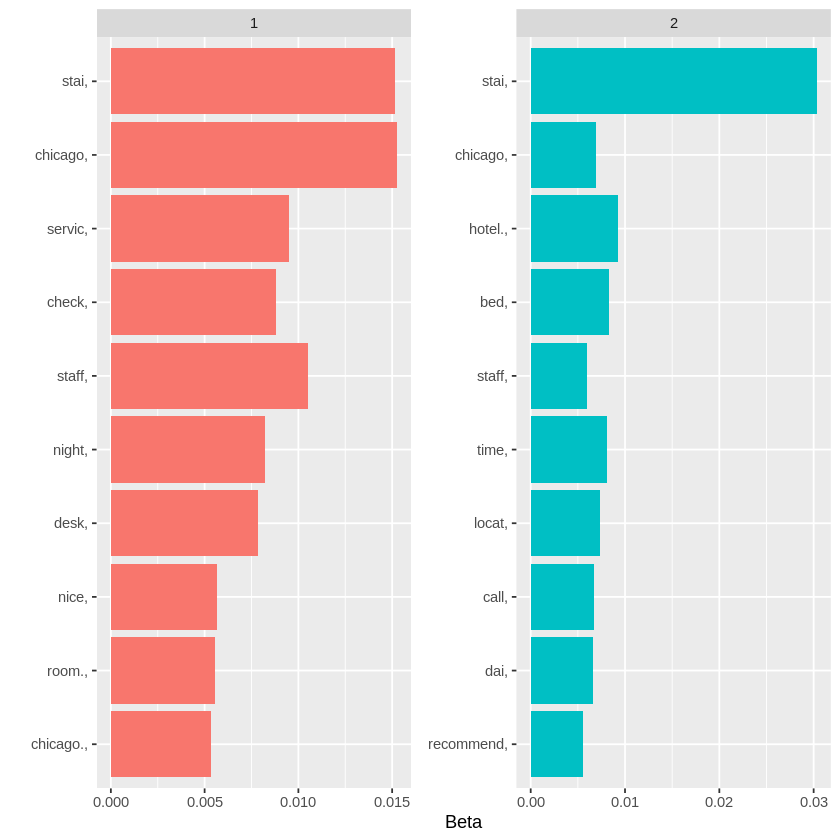

In [ ]:
# ============================================================
# Step 5-6: LDA() after stemming
# ============================================================

#  wordStem(words, language = "en")
#   Function       : Reduces words to their stem (root) form — a process known as *stemming*.
#                    Provided by the 'SnowballC' package, which implements the Snowball stemming
#                    algorithm. It helps normalize words so that variations (e.g., "running",
#                    "runs", "ran") are treated as the same root term ("run").
#
#   words          : A character vector of words to be stemmed.
#                    Each element is processed and reduced to its base or root form.
#                    - Example: c("running", "jumps", "easily") → "run", "jump", "easili"
#
#   language       : A character string specifying the language of the stemming algorithm.
#                    Default is "en" (English). Other supported options include:
#                    "fr" (French), "de" (German), "es" (Spanish), "it" (Italian),
#                    "pt" (Portuguese), "nl" (Dutch), etc.
#
#   Returns        : A character vector of the same length as 'words',
#                    where each word has been replaced by its stemmed version.
#
#   Output         : Used in text preprocessing workflows (e.g., before building
#                    a DocumentTermMatrix or performing topic modeling) to reduce
#                    dimensionality and merge inflected forms of the same term.
#--------------------------------------------------------------------------------
#   term           : The character vector of words (tokens) to stem — often derived
#                    from a tidy text column like 'term' or 'word'.
#
#   wordStem(term) :
#                    Applies stemming to each element of 'term', producing their
#                    root forms.
#
#   Example        :
#                    library(SnowballC)
#                    term <- c("running", "runs", "easily", "fairness")
#                    wordStem(term)
#                    # Output: "run" "run" "easili" "fair"
#
#--------------------------------------------------------------------------------
#   Common Use     :
#                    topics <- topics %>%
#                      mutate(stemmed_term = wordStem(term))
#                    # Adds a new column with stemmed words, improving term matching
#                    # and reducing redundancy in text analysis.


# stem the words (e.g. convert each word to its stem, where applicable)
reviewsDTM_tidy_cleaned <- reviewsDTM_tidy_cleaned %>%
    mutate(stem = wordStem(term))

# reconstruct our documents
cleaned_documents <- reviewsDTM_tidy_cleaned %>%
    group_by(document) %>%
    mutate(terms = toString(rep(stem, count))) %>%
    select(document, terms) %>%
    unique()

# now let's look at the new most informative terms
top_terms_by_topic_LDA(cleaned_documents$terms, number_of_topics = 2)

> ##### **Words like “stai”?** These are the stems of the words, which in this case are generated using the [Porter Stemming Algorithm](https://tartarus.org/martin/PorterStemmer/). If we look at our “horse” example above, the stem of “horses”, “horse”, and “horsing [around]” is actually “hors”, not “horse”. That’s because “hors” is the longest string that occurs in all three words

* In this instance, it doesn’t actually look like stemming was actually that helpful in terms of generating informative topics. We also don’t know which (if either) of these topics are associated with deceptive reviews and which are associated with truthful ones.

* Fortunately, we actually do have the labels for whether each review is truthful or deceptive, which means that we can use a supervised method of topic modeling instead

* In general, unsupervised methods (like LDA) are helpful for data exploration but supervised methods (like TF-IDF, which we’re going to learn next) are usually a better choice if you have access to labeled data

* We’ve started with ab unsupervised method here in order to give you the chance to directly compare LDA and TF-IDF on the same dataset.

### 5.3. Using TF-IDF (supervised approach)

Now that we’ve given unsupervised topic modelling a go, let’s try supervised topic modeling. For this, we’re going to use something call TF-IDF, which stands for “term frequency-inverse document frequency”.

The general idea behind how TF-IDF works is this:

- Words that are very common in a specific document are probably important to the topic of that document
- Words that are very common in all documents probably aren’t important to the topics of any of them.

So a term will recieve a high weight if it’s common in a specific document and also uncommon across all documents.

In order to streamline our analysis, I’m going to write a function that takes in a dataframe, the name of the column that has the texts in it and the name of the column that has the topic labels in it.

In [ ]:
# ============================================================
# Step 5-7: TF-IDF for supervised topic modeling
# Similiar to step 5-2 in defining a function
# ============================================================

#  top_terms_by_topic_tfidf <- function(text_df, text_column, group_column, plot = T) { ... }
#   Function       : Defines a custom R function that computes the most informative terms
#                    for each group (e.g., topic, document, or category) using the
#                    Term Frequency–Inverse Document Frequency (TF–IDF) statistic.
#                    Optionally, it produces a faceted bar chart showing the top TF–IDF
#                    terms for each group.
#
#   text_df        : A data frame or tibble containing the text data and grouping variable.
#                    Must include at least one column of text (unstructured text data)
#                    and one column defining the grouping variable (e.g., document or topic).
#
#   text_column    : The unquoted name of the column containing the text to be analyzed.
#                    This argument is quoted within the function using 'enquo()' to allow
#                    tidy evaluation.
#
#   group_column   : The unquoted name of the grouping variable (e.g., document ID, category,
#                    or topic label). Also captured with 'enquo()' for tidy evaluation.
#
#   plot           : Logical flag (default = TRUE). If TRUE, returns a ggplot bar chart
#                    of top terms per group by TF–IDF score. If FALSE, returns a full
#                    tidy data frame of all TF–IDF values.
#
#   Returns        : Either:
#                    1. A ggplot object visualizing the top 10 TF–IDF terms per group, or
#                    2. A tibble containing all terms with their computed TF–IDF scores.
#
#   Output         : Used for identifying words that are most unique and informative
#                    within groups of text (e.g., distinguishing terms between topics,
#                    authors, or documents).
#--------------------------------------------------------------------------------
#   Function Body  :
#
#   group_column <- enquo(group_column)
#   text_column  <- enquo(text_column)
#                    - Captures the unquoted column names for use inside tidyverse
#                      functions (a technique known as *tidy evaluation*).
#                    - This allows users to pass column names without quotes.
#
#   words <- text_df %>%
#              unnest_tokens(word, !!text_column) %>%
#              count(!!group_column, word) %>%
#              ungroup()
#                    - Tokenizes text into individual words using 'tidytext::unnest_tokens()'.
#                    - Counts how often each word occurs in each group.
#                    - Produces a tidy data frame with columns:
#                      group | word | n
#
#   total_words <- words %>%
#                    group_by(!!group_column) %>%
#                    summarize(total = sum(n))
#                    - Calculates the total number of words per group, useful for normalization.
#
#   words <- left_join(words, total_words)
#                    - Joins total word counts back to the main word-frequency table
#                      so each row includes both word count and total word count per group.
#
#   tf_idf <- words %>%
#               bind_tf_idf(word, !!group_column, n) %>%
#               select(-total) %>%
#               arrange(desc(tf_idf)) %>%
#               mutate(word = factor(word, levels = rev(unique(word))))
#                    - Uses 'bind_tf_idf()' from 'tidytext' to compute term frequency–inverse
#                      document frequency for each word.
#                    - TF–IDF identifies words that are frequent in one group but rare across others.
#                    - Orders words by decreasing TF–IDF and converts 'word' to an ordered factor.
#
#   if (plot == T) {
#                    - Conditional statement: if plotting is requested (default behavior).
#                    - Converts the captured group column symbol to a string for ggplot facet labels.
#                    - Selects the top 10 highest-TF–IDF terms per group.
#                    - Creates a faceted horizontal bar chart:
#                        • x-axis: words
#                        • y-axis: TF–IDF value
#                        • fill: differentiates groups
#                    - 'facet_wrap()' creates one subplot per group.
#   } else {
#       return(tf_idf)
#                    - If plot = FALSE, returns the full data frame of TF–IDF values.
#   }
#


#  enquo(arg)
#   Function       : Captures an expression (typically a column name or variable)
#                    as a *quoted quosure* for use in tidy evaluation.
#                    Provided by the 'rlang' package and used extensively in
#                    tidyverse functions to enable *non-standard evaluation* (NSE).
#
#   arg            : The unquoted function argument (e.g., a column name) that you want
#                    to capture and later evaluate inside tidyverse expressions.
#                    - Example: group_column, text_column
#
#   Returns        : A *quosure* object — a special R object that stores both:
#                    1. The expression itself (e.g., the symbol 'group_column')
#                    2. The environment in which it was created (so it can be evaluated later)
#
#   Output         : Used to make functions compatible with tidyverse verbs like
#                    'group_by()', 'summarize()', or 'mutate()' that use non-standard
#                    evaluation of column names.
#--------------------------------------------------------------------------------
#   group_column   : The unquoted name of a column passed to a function argument.
#                    For example, a user might call:
#                    top_terms_by_topic_tfidf(text_df, text, product)
#
#                    Inside the function, 'group_column' receives 'product' (unquoted),
#                    and 'enquo(group_column)' captures it as a quosure.
#
#   enquo(group_column) :
#                    Captures 'group_column' as a quosure so it can be referenced later
#                    using tidy evaluation syntax ('!!group_column') inside dplyr verbs.



top_terms_by_topic_tfidf <- function(text_df, text_column, group_column, plot = T)
                            {
                            # name for the column we're going to unnest_tokens_ to
                            # (you only need to worry about enquo stuff if you're
                            # writing a function using using tidyverse packages)
                            group_column <- enquo(group_column)
                            text_column <- enquo(text_column)

                            # get the count of each word in each review
                            words <- text_df %>%
                              unnest_tokens(word, !!text_column) %>%
                              count(!!group_column, word) %>%
                              ungroup()

                            # get the number of words per text
                            total_words <- words %>%
                              group_by(!!group_column) %>%
                              summarize(total = sum(n))

                            # combine the two dataframes we just made
                            words <- left_join(words, total_words)

                            # get the tf_idf & order the words by degree of relevence
                            tf_idf <- words %>%
                              bind_tf_idf(word, !!group_column, n) %>%
                              select(-total) %>%
                              arrange(desc(tf_idf)) %>%
                              mutate(word = factor(word, levels = rev(unique(word))))

                            if(plot == T){
                                # convert "group" into a quote of a name
                                # (this is due to funkiness with calling ggplot2
                                # in functions)
                                group_name <- quo_name(group_column)

                                # plot the 10 most informative terms per topic
                                tf_idf %>%
                                  group_by(!!group_column) %>%
                                  top_n(10) %>%
                                  ungroup %>%
                                  ggplot(aes(word, tf_idf, fill = as.factor(group_name))) +
                                  geom_col(show.legend = FALSE) +
                                  labs(x = NULL, y = "tf-idf") +
                                  facet_wrap(reformulate(group_name), scales = "free") +
                                  coord_flip()
                            }else{
                                # return the entire tf_idf dataframe
                                return(tf_idf)
                            }
                        }

deceptive,hotel,polarity,source,text
<chr>,<chr>,<chr>,<chr>,<chr>
truthful,conrad,positive,TripAdvisor,"We stayed for a one night getaway with family on a thursday. Triple AAA rate of 173 was a steal. 7th floor room complete with 44in plasma TV bose stereo, voss and evian water, and gorgeous bathroom(no tub but was fine for us) Concierge was very helpful. You cannot beat this location... Only flaw was breakfast was pricey and service was very very slow(2hours for four kids and four adults on a friday morning) even though there were only two other tables in the restaurant. Food was very good so it was worth the wait. I would return in a heartbeat. A gem in chicago..."
truthful,hyatt,positive,TripAdvisor,"Triple A rate with upgrade to view room was less than $200 which also included breakfast vouchers. Had a great view of river, lake, Wrigley Bldg. & Tribune Bldg. Most major restaurants, Shopping, Sightseeing attractions within walking distance. Large room with a very comfortable bed."


Joining with `by = join_by(deceptive)`
Selecting by tf_idf


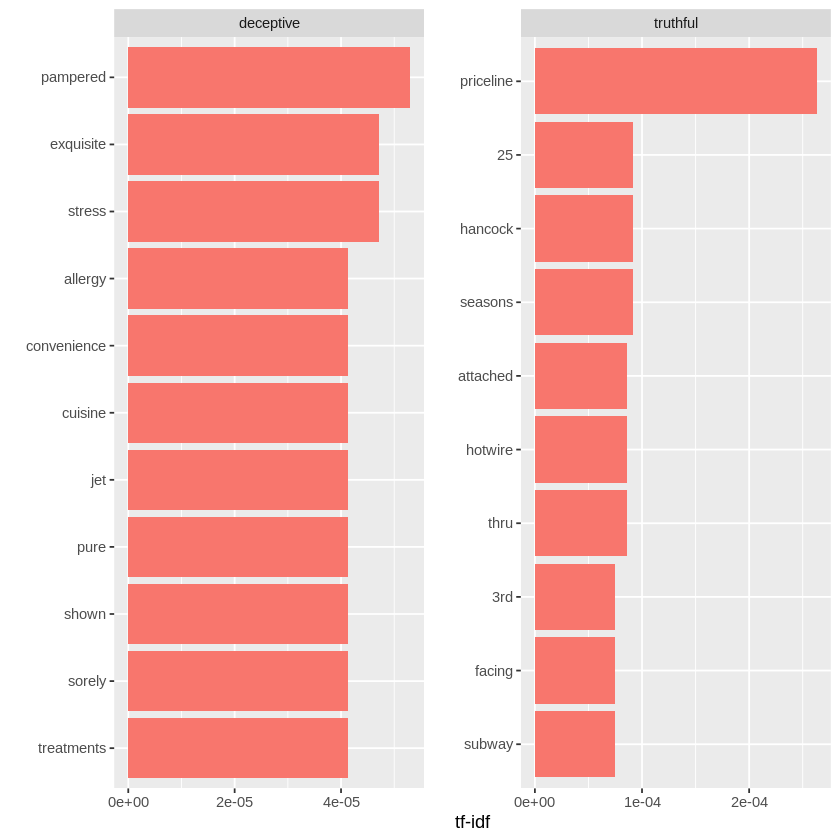

In [ ]:

# ============================================================
# Step 5-8: Call the function to find the most informative deceptive words
# ============================================================

head(reviews, 2)

top_terms_by_topic_tfidf(text_df = reviews, # dataframe
                         text_column = text, # column with text
                         group_column = deceptive, # column with topic label
                         plot = T) # return a plot

* So it looks like **false reviews** tend to use a lot of glowing praise in their reviews (“pampered”, “exquisite”), while truthful reviews tend to talk about how they booked thier room (“priceline”, “hotwire”)

* Since we have a function written, we can easily check out the most informative words for other topics. This dataset is also annotated for whether the reveiw was positive or negative, so let’s see which words are associated with which polarity

Joining with `by = join_by(polarity)`
Selecting by tf_idf


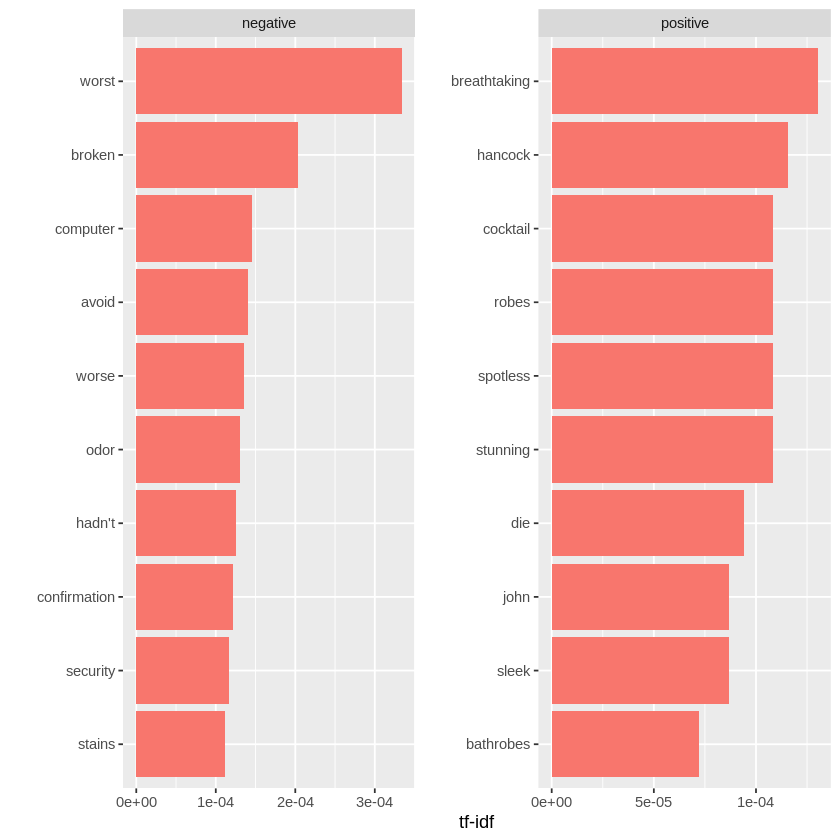

In [ ]:
# ============================================================
# Step 5-9: Call the function to find the most informative words for postive and negative reveiws
# ============================================================


top_terms_by_topic_tfidf(text_df = reviews,
                         text_column = text,
                         group = polarity,
                         plot = T)

* From this, we can see that negative reviews include words like “worst”, “broken”, “odor” and “stains”, while positive reviews really harp on the bathrobes (both “robes” and “bathrobes” show up in the top ten words)

* Just for fun/as a sanity check, let’s check out the reviews for each hotel individually. I’m going to use the function I wrote above to return just the TF-IDF output and then do my own plotting, since I don’t think the default plot will look good with so many different categories (there are 20 different hotels in this dataset)

Joining with `by = join_by(hotel)`
Selecting by tf_idf


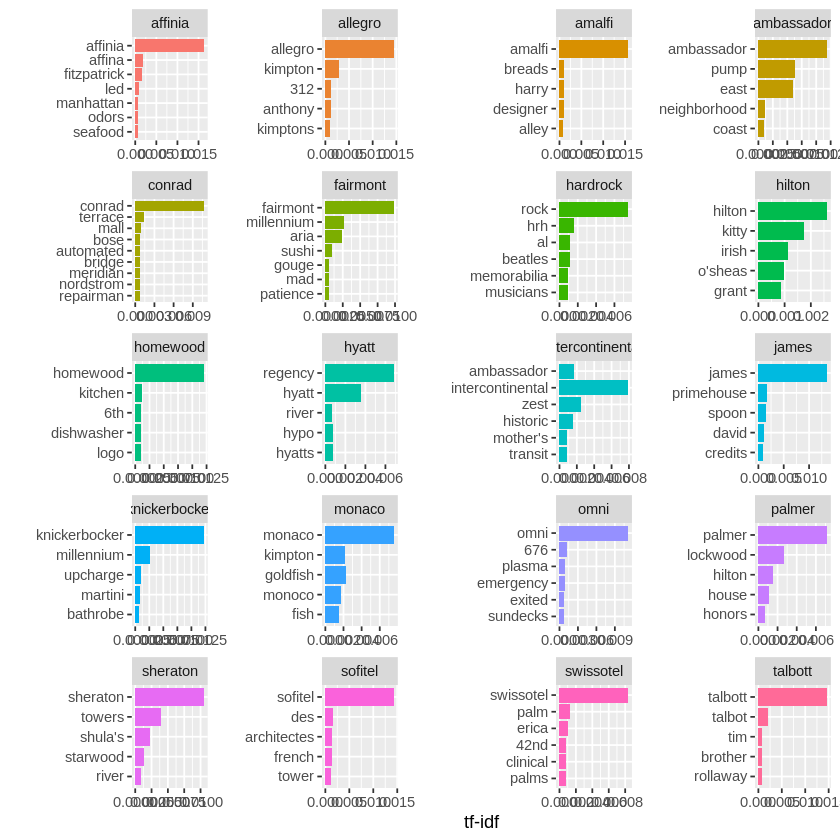

In [ ]:
# ============================================================
# Step 5-10: Most informative word for reviews
# ============================================================

# get just the tf-idf output for the hotel topics
reviews_tfidf_byHotel <- top_terms_by_topic_tfidf(text_df = reviews,
                         text_column = text,
                         group = hotel,
                         plot = F)

# do our own plotting
reviews_tfidf_byHotel  %>%
          group_by(hotel) %>%
          top_n(5) %>%
          ungroup %>%
          ggplot(aes(word, tf_idf, fill = hotel)) +
          geom_col(show.legend = FALSE) +
          labs(x = NULL, y = "tf-idf") +
          facet_wrap(~hotel, ncol = 4, scales = "free", ) +
          coord_flip()

* Unsurprisingly, the most informative word for reviews about a hotel is the name of the hotel itself

* We can also tell a little bit about the features of different hotels: the Monaco has goldfish, Homewood has a kitchen with a dishwasher and Hardrock has musical memorabilia